In [18]:
frase = "Vou criar um código demonstrativo completo dos fundamentos de embeddings em Python para você:"

In [ ]:
import numpy as np

def criar_embedding(palavra):
    return np.random.rand(4)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

palavras = frase.split()

embeddings = [criar_embedding(palavra) for palavra in palavras]

def self_attention(embeddings):
    Q = np.array(embeddings)
    K = np.array(embeddings)
    V = np.array(embeddings)
    
    scores = np.dot(Q, K.T)
    
    precos_atencao = softmax(scores)
    
    valores_ponderados = np.dot(precos_atencao, V)
    
    return precos_atencao, valores_ponderados

presos_atencao, valores_ponderados = self_attention(embeddings)


print("Frase original: ", frase)
print("\nPesos de atenção:")

for i, palavra in enumerate(palavras):
    print(f"\nPara a palavra '{palavra}'")
    top_3 = sorted(range(len(palavras)), key=lambda j: presos_atencao[i][j], reverse=True)[:3]
    for j in top_3:
        print(f"Atencoa para '{palavras[j]}': {presos_atencao[i][j]:.4f}")

print("\nExplicacao")    

for i, palavra in enumerate(palavras):
    max_atencao = np.argmax(presos_atencao[i])
    print(f"'{palavra}' presta mais atencao em '{palavras[max_atencao]}'")


ANALISANDO A FRASE: 'o gato subiu no telhado'

Número de palavras: 5
Palavras: ['o', 'gato', 'subiu', 'no', 'telhado']
Dimensão dos embeddings: 4

MECANISMO SELF-ATTENTION - PASSO A PASSO
1. MATRIZES Q, K, V
   Forma: (5, 4) (palavras × dimensões)
   Q = K = V = embeddings das palavras

2. SCORES DE SIMILARIDADE (Q × K^T)
   Forma: (5, 5) (palavra × palavra)
   Matriz de scores:


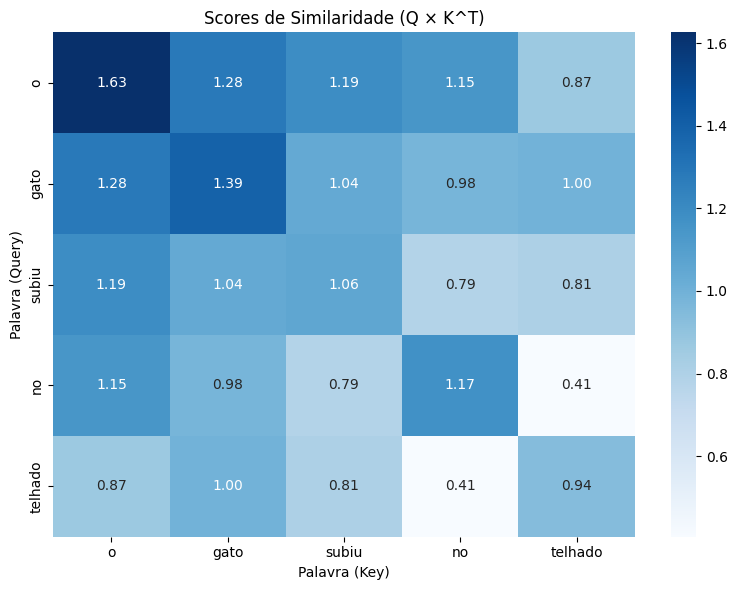


3. PESOS DE ATENÇÃO (após Softmax)
   Cada linha soma 1 (probabilidades)


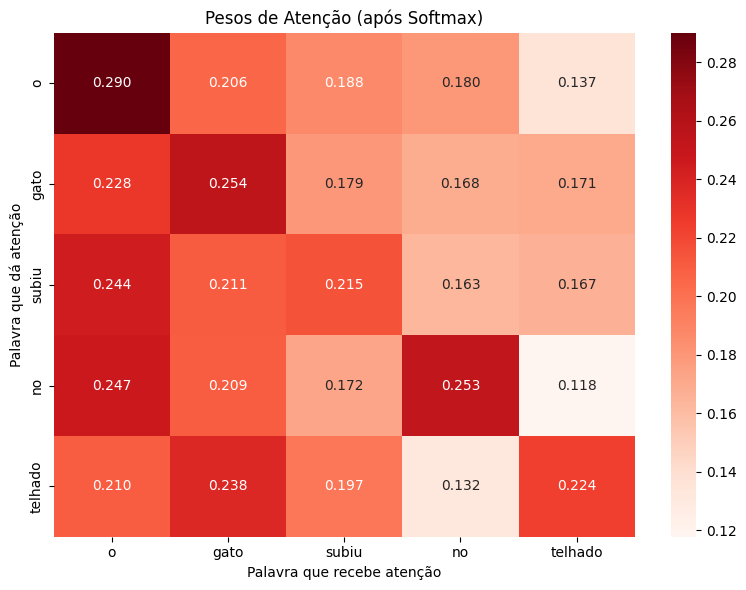

   Verificação - soma de cada linha:
   o: 1.000000
   gato: 1.000000
   subiu: 1.000000
   no: 1.000000
   telhado: 1.000000

4. VALORES PONDERADOS (Atenção × V)
   Forma: (5, 4)
   Cada palavra agora contém informação de todas as outras

5. ANÁLISE DOS PADRÕES DE ATENÇÃO
----------------------------------------

Para a palavra 'o':
  1º lugar: 'o' = 0.2901
  2º lugar: 'gato' = 0.2059
  3º lugar: 'subiu' = 0.1877
  4º lugar: 'no' = 0.1798
  5º lugar: 'telhado' = 0.1365
  → 'o' presta mais atenção em SI MESMA (autoatenção)

Para a palavra 'gato':
  1º lugar: 'gato' = 0.2539
  2º lugar: 'o' = 0.2278
  3º lugar: 'subiu' = 0.1792
  4º lugar: 'telhado' = 0.1709
  5º lugar: 'no' = 0.1683
  → 'gato' presta mais atenção em SI MESMA (autoatenção)

Para a palavra 'subiu':
  1º lugar: 'o' = 0.2444
  2º lugar: 'subiu' = 0.2150
  3º lugar: 'gato' = 0.2108
  4º lugar: 'telhado' = 0.1668
  5º lugar: 'no' = 0.1630
  → 'subiu' presta mais atenção em 'o'

Para a palavra 'no':
  1º lugar: 'no' = 0.2528


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo a função softmax corrigida
def softmax(x):
    """Aplica softmax em cada linha da matriz"""
    if x.ndim == 1:
        return np.exp(x) / np.sum(np.exp(x))
    else:
        # Para cada linha (palavra), aplica softmax
        result = np.zeros_like(x)
        for i in range(x.shape[0]):
            result[i] = np.exp(x[i]) / np.sum(np.exp(x[i]))
        return result

def criar_embedding(palavra):
    """Cria embedding fixo baseado na palavra para demonstração"""
    # Usar hash para ter embeddings consistentes
    np.random.seed(hash(palavra) % 1000)
    return np.random.rand(4)

def self_attention_detalhado(embeddings, palavras):
    """Self-attention com explicações detalhadas"""
    print("=" * 60)
    print("MECANISMO SELF-ATTENTION - PASSO A PASSO")
    print("=" * 60)
    
    # 1. Preparar Q, K, V
    Q = np.array(embeddings)  # Queries
    K = np.array(embeddings)  # Keys  
    V = np.array(embeddings)  # Values
    
    print(f"1. MATRIZES Q, K, V")
    print(f"   Forma: {Q.shape} (palavras × dimensões)")
    print(f"   Q = K = V = embeddings das palavras")
    print()
    
    # 2. Calcular scores (Q × K^T)
    scores = np.dot(Q, K.T)
    print(f"2. SCORES DE SIMILARIDADE (Q × K^T)")
    print(f"   Forma: {scores.shape} (palavra × palavra)")
    print("   Matriz de scores:")
    
    # Mostrar matriz de scores
    plt.figure(figsize=(8, 6))
    sns.heatmap(scores, 
                xticklabels=palavras, 
                yticklabels=palavras,
                annot=True, 
                fmt='.2f',
                cmap='Blues')
    plt.title('Scores de Similaridade (Q × K^T)')
    plt.xlabel('Palavra (Key)')
    plt.ylabel('Palavra (Query)')
    plt.tight_layout()
    plt.show()
    
    print()
    
    # 3. Aplicar softmax
    pesos_atencao = softmax(scores)
    print(f"3. PESOS DE ATENÇÃO (após Softmax)")
    print("   Cada linha soma 1 (probabilidades)")
    
    # Mostrar matriz de atenção
    plt.figure(figsize=(8, 6))
    sns.heatmap(pesos_atencao, 
                xticklabels=palavras, 
                yticklabels=palavras,
                annot=True, 
                fmt='.3f',
                cmap='Reds')
    plt.title('Pesos de Atenção (após Softmax)')
    plt.xlabel('Palavra que recebe atenção')
    plt.ylabel('Palavra que dá atenção')
    plt.tight_layout()
    plt.show()
    
    # 4. Verificar se cada linha soma 1
    print("   Verificação - soma de cada linha:")
    for i, palavra in enumerate(palavras):
        soma = np.sum(pesos_atencao[i])
        print(f"   {palavra}: {soma:.6f}")
    print()
    
    # 5. Calcular valores ponderados
    valores_ponderados = np.dot(pesos_atencao, V)
    print(f"4. VALORES PONDERADOS (Atenção × V)")
    print(f"   Forma: {valores_ponderados.shape}")
    print("   Cada palavra agora contém informação de todas as outras")
    print()
    
    return pesos_atencao, valores_ponderados

def analisar_atencao(pesos_atencao, palavras):
    """Analisa os padrões de atenção"""
    print("5. ANÁLISE DOS PADRÕES DE ATENÇÃO")
    print("-" * 40)
    
    for i, palavra in enumerate(palavras):
        print(f"\nPara a palavra '{palavra}':")
        
        # Top 3 palavras com maior atenção
        indices_ordenados = np.argsort(pesos_atencao[i])[::-1]
        
        for j, idx in enumerate(indices_ordenados):
            peso = pesos_atencao[i][idx]
            print(f"  {j+1}º lugar: '{palavras[idx]}' = {peso:.4f}")
            
        # Palavra com maior atenção
        max_idx = np.argmax(pesos_atencao[i])
        if max_idx == i:
            print(f"  → '{palavra}' presta mais atenção em SI MESMA (autoatenção)")
        else:
            print(f"  → '{palavra}' presta mais atenção em '{palavras[max_idx]}'")

def comparar_antes_depois(embeddings_originais, valores_ponderados, palavras):
    """Compara embeddings antes e depois da atenção"""
    print("\n6. COMPARAÇÃO: ANTES vs DEPOIS DA ATENÇÃO")
    print("-" * 50)
    
    for i, palavra in enumerate(palavras):
        print(f"\n'{palavra}':")
        print(f"  Antes:  [{', '.join([f'{x:.3f}' for x in embeddings_originais[i]])}]")
        print(f"  Depois: [{', '.join([f'{x:.3f}' for x in valores_ponderados[i]])}]")
        
        # Calcular mudança
        mudanca = np.linalg.norm(valores_ponderados[i] - embeddings_originais[i])
        print(f"  Mudança: {mudanca:.3f}")

def explicar_conceitos():
    """Explica os conceitos fundamentais"""
    print("\n" + "="*60)
    print("CONCEITOS FUNDAMENTAIS DO SELF-ATTENTION")
    print("="*60)
    
    conceitos = {
        "Self-Attention": "Cada palavra 'olha' para todas as outras na sequência",
        "Queries (Q)": "O que cada palavra está 'perguntando' ou 'procurando'",
        "Keys (K)": "O que cada palavra 'oferece' como informação",
        "Values (V)": "O conteúdo real que será combinado",
        "Scores": "Similaridade entre queries e keys (Q × K^T)",
        "Softmax": "Converte scores em probabilidades (soma = 1)",
        "Pesos de Atenção": "Quanto cada palavra 'presta atenção' em cada outra",
        "Valores Ponderados": "Nova representação que combina informação contextual"
    }
    
    for conceito, explicacao in conceitos.items():
        print(f"\n{conceito}:")
        print(f"  {explicacao}")
    
    print(f"\nPOR QUE É ÚTIL?")
    print("- Captura relações entre palavras distantes na sequência")
    print("- Permite paralelização (vs RNNs sequenciais)")
    print("- Base dos modelos Transformer (BERT, GPT, etc.)")
    print("- Cada palavra ganha contexto de toda a sequência")

# DEMONSTRAÇÃO COMPLETA
def demonstracao_completa():
    # Exemplo de frase
    frase = "o gato subiu no telhado"
    print(f"ANALISANDO A FRASE: '{frase}'")
    print()
    
    # Preparar dados
    palavras = frase.split()
    embeddings = [criar_embedding(palavra) for palavra in palavras]
    
    print(f"Número de palavras: {len(palavras)}")
    print(f"Palavras: {palavras}")
    print(f"Dimensão dos embeddings: {len(embeddings[0])}")
    print()
    
    # Executar self-attention detalhado
    pesos_atencao, valores_ponderados = self_attention_detalhado(embeddings, palavras)
    
    # Analisar padrões
    analisar_atencao(pesos_atencao, palavras)
    
    # Comparar antes/depois
    comparar_antes_depois(embeddings, valores_ponderados, palavras)
    
    # Explicar conceitos
    explicar_conceitos()
    
    return pesos_atencao, valores_ponderados

# Executar demonstração
if __name__ == "__main__":
    pesos, valores = demonstracao_completa()